### Simple Linear Regression Algorithm

Simple linear regression models the relationship between two continuous variables: a dependent variable (Y) and an independent variable (X). The goal is to find a linear equation that best predicts the value of Y based on X.

**Algorithm Steps:**

1.  **Define the Model Equation:** The relationship is represented by a straight line:
    $Y = \beta_0 + \beta_1X + \epsilon$
    where:
    *   $Y$ is the dependent variable (what we want to predict).
    *   $X$ is the independent variable (the feature).
    *   $\beta_0$ is the Y-intercept (the value of Y when X is 0).
    *   $\beta_1$ is the slope of the line (how much Y changes for a one-unit change in X).
    *   $\epsilon$ is the error term, representing the difference between the observed and predicted values.

2.  **Estimate Coefficients ($\beta_0$, $\beta_1$):** The most common method is **Ordinary Least Squares (OLS)**. OLS aims to minimize the sum of the squared differences between the actual observed values ($Y_i$) and the values predicted by the model ($\hat{Y}_i$).
    
    The formulas for $\beta_0$ and $\beta_1$ are derived to minimize this sum of squared errors:
    
    $\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}$
    
    $\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1\bar{X}$
    
    where $\bar{X}$ and $\bar{Y}$ are the means of X and Y, respectively.

3.  **Make Predictions:** Once $\hat{\beta}_0$ and $\hat{\beta}_1$ are determined, the prediction equation becomes:
    $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X$

4.  **Evaluate the Model:** Assess how well the model fits the data using metrics like:
    *   **Mean Squared Error (MSE):** Average of the squared differences between predicted and actual values.
    *   **R-squared (Coefficient of Determination):** Represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

### Multiple Linear Regression Algorithm

Multiple linear regression extends simple linear regression to model the relationship between a dependent variable (Y) and two or more independent variables ($X_1, X_2, ..., X_n$). The goal is to find a linear equation that best predicts the value of Y based on multiple features.

**Algorithm Steps:**

1.  **Define the Model Equation:** The relationship is represented by a hyperplane:
    $Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$
    where:
    *   $Y$ is the dependent variable.
    *   $X_1, X_2, ..., X_n$ are the independent variables (features).
    *   $\beta_0$ is the Y-intercept.
    *   $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for each independent variable, indicating the change in Y for a one-unit change in the respective X, holding other variables constant.
    *   $\epsilon$ is the error term.

2.  **Estimate Coefficients ($\beta_0, \beta_1, ..., \beta_n$):** Similar to simple linear regression, the **Ordinary Least Squares (OLS)** method is used. However, with multiple variables, this often involves matrix algebra to solve for the coefficients simultaneously by minimizing the sum of squared errors. The solution for the coefficients ($\hat{\beta}$) can be expressed as:
    
    $\hat{\beta} = (X^TX)^{-1}X^TY$
    
    where:
    *   $\hat{\beta}$ is the vector of estimated coefficients (including $\hat{\beta}_0$).
    *   $X$ is the design matrix containing the independent variables (with a column of ones for the intercept).
    *   $Y$ is the vector of dependent variable values.
    *   $T$ denotes the matrix transpose.
    *   $-1$ denotes the matrix inverse.

3.  **Make Predictions:** Once all coefficients ($\hat{\beta}_0, \hat{\beta}_1, ..., \hat{\beta}_n$) are determined, the prediction equation becomes:
    $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 + ... + \hat{\beta}_nX_n$

4.  **Evaluate the Model:** Assess model performance using metrics similar to simple linear regression, such as:
    *   **Mean Squared Error (MSE)**
    *   **R-squared (Coefficient of Determination)**
    *   **Adjusted R-squared:** A modified version of R-squared that accounts for the number of predictors in the model, providing a better comparison between models with different numbers of independent variables.

### Implementing Linear Regression with a Built-in Dataset (Single Feature Example)

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# For single linear regression, let's pick one feature, for example, the first feature
X_single_feature = X_diabetes[:, 2].reshape(-1, 1) # Reshape for sklearn

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y_diabetes, test_size=0.2, random_state=42)

print("Dataset loaded and split.")
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Dataset loaded and split.
Training data shape: (353, 1), (353,)
Testing data shape: (89, 1), (89,)


### Train and Evaluate the Single Linear Regression Model

Mean Squared Error (Single Feature): 4061.83
R-squared (Single Feature): 0.23


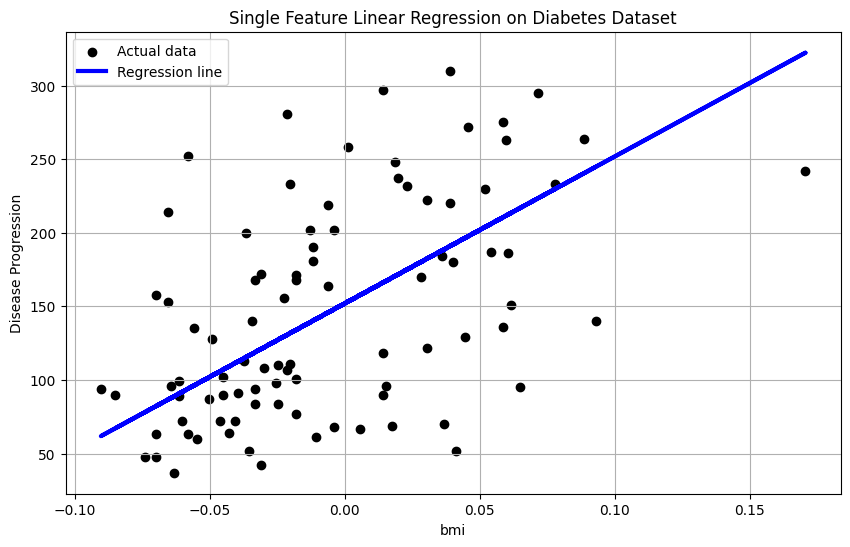

In [ ]:
# Initialize and train the Linear Regression model
model_single = LinearRegression()
model_single.fit(X_train, y_train)

# Make predictions on the test set
y_pred_single = model_single.predict(X_test)

# Evaluate the model
mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"Mean Squared Error (Single Feature): {mse_single:.2f}")
print(f"R-squared (Single Feature): {r2_single:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred_single, color='blue', linewidth=3, label='Regression line')
plt.xlabel(diabetes.feature_names[2])
plt.ylabel('Disease Progression')
plt.title('Single Feature Linear Regression on Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.show()


### Implementing Multi-Linear Regression with the Built-in Dataset (Multiple Features)

In [ ]:
# Using all features for multi-linear regression
X_multi_feature = X_diabetes

# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_feature, y_diabetes, test_size=0.2, random_state=42)

print("Multi-feature dataset split.")
print(f"Training data shape: {X_train_multi.shape}, {y_train_multi.shape}")
print(f"Testing data shape: {X_test_multi.shape}, {y_test_multi.shape}")


Multi-feature dataset split.
Training data shape: (353, 10), (353,)
Testing data shape: (89, 10), (89,)


### Train and Evaluate the Multi-Linear Regression Model

In [ ]:
# Initialize and train the Multi-Linear Regression model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Make predictions on the test set
y_pred_multi = model_multi.predict(X_test_multi)

# Evaluate the model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Mean Squared Error (Multi-Feature): {mse_multi:.2f}")
print(f"R-squared (Multi-Feature): {r2_multi:.2f}")

print("\nModel Coefficients (Multi-Feature):")
for i, coef in enumerate(model_multi.coef_):
    print(f"{diabetes.feature_names[i]}: {coef:.2f}")
print(f"Intercept: {model_multi.intercept_:.2f}")


Mean Squared Error (Multi-Feature): 2900.19
R-squared (Multi-Feature): 0.45

Model Coefficients (Multi-Feature):
age: 37.90
sex: -241.96
bmi: 542.43
bp: 347.70
s1: -931.49
s2: 518.06
s3: 163.42
s4: 275.32
s5: 736.20
s6: 48.67
Intercept: 151.35


### Comparing Simple Linear Regression and Multiple Linear Regression

We've now implemented both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) using the Diabetes dataset. Let's compare them, answer some common questions, and understand their respective strengths and weaknesses.

#### 1. What are the core differences?

*   **Number of Independent Variables (Features):**
    *   **Simple Linear Regression:** Uses only *one* independent variable to predict the dependent variable.
    *   **Multiple Linear Regression:** Uses *two or more* independent variables to predict the dependent variable.

*   **Model Equation:**
    *   **SLR:** $Y = \beta_0 + \beta_1X + \epsilon$ (a straight line)
    *   **MLR:** $Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$ (a hyperplane in higher dimensions)

*   **Interpretation of Coefficients:**
    *   **SLR ($\beta_1$):** Represents the change in the dependent variable for a one-unit change in the *single* independent variable.
    *   **MLR ($\beta_i$):** Represents the change in the dependent variable for a one-unit change in $X_i$, *holding all other independent variables constant*. This 'holding constant' aspect is crucial and makes MLR coefficients more nuanced to interpret.

*   **Complexity:**
    *   **SLR:** Simpler model, easier to visualize and interpret. Useful for understanding a direct relationship between two variables.
    *   **MLR:** More complex, can capture more intricate relationships in data by considering multiple factors. Visualization becomes challenging beyond two independent variables.

#### 2. When to use each?

*   **Use Simple Linear Regression when:**
    *   You want to understand the relationship between a single predictor and a response variable.
    *   You have limited data or features and a simple model is sufficient.
    *   You need a highly interpretable model for a specific pair of variables.
    *   *Example:* Predicting house price based *only* on square footage.

*   **Use Multiple Linear Regression when:**
    *   You believe multiple factors influence the dependent variable.
    *   You want a more accurate predictive model by leveraging all available relevant features.
    *   You need to control for the effects of other variables when examining a specific predictor's impact.
    *   *Example:* Predicting house price based on square footage, number of bedrooms, location, age of the house, etc.

#### 3. How do they compare in terms of performance (based on our example)?

From our execution:

*   **Single Feature Linear Regression (using 'bmi' feature from Diabetes dataset):**
    *   Mean Squared Error (MSE): `4061.83`
    *   R-squared: `0.23`

*   **Multi-Feature Linear Regression (using all 10 features from Diabetes dataset):**
    *   Mean Squared Error (MSE): `2900.19`
    *   R-squared: `0.45`

**Analysis:**

*   **R-squared:** The R-squared value increased significantly from 0.23 (SLR) to 0.45 (MLR). This indicates that the multi-feature model explains a higher proportion of the variance in the target variable (disease progression) compared to the single-feature model. In other words, adding more relevant features improved the model's ability to fit the data.

*   **Mean Squared Error (MSE):** The MSE decreased from 4061.83 (SLR) to 2900.19 (MLR). A lower MSE means that the predictions from the multi-feature model are, on average, closer to the actual values than those from the single-feature model. This confirms the improved predictive accuracy of the MLR model.

*   **Coefficients:** For MLR, we saw coefficients for each of the 10 features, along with an intercept. These coefficients tell us the estimated impact of each feature on the disease progression, *assuming all other features are held constant*. For example, a positive coefficient for 'bmi' (542.43) suggests that higher BMI is associated with increased disease progression, while a negative coefficient for 'sex' (-241.96) suggests a difference in progression between the two sexes when all other factors are accounted for.

#### Conclusion:

In our Diabetes dataset example, **Multiple Linear Regression performed significantly better** than Simple Linear Regression. This is often the case in real-world scenarios where complex phenomena are influenced by numerous interacting factors. While SLR is valuable for simple relationships and initial exploration, MLR provides a more robust and accurate model when multiple predictors are relevant.